# Finding Items Bought Together

## Overview

Customers are important to the survival and success of any business because they are the source of the revenue. The success of a business is the ability to satisfy customers and make them happy, and therefore turn a profit from them. Giving the customer recommendation about items that can buy it with items in their online basket may attract them.
Using retail transactional data can help to build models for finding the items that are bought together and recommending customers about items that can buy it. 

In this project, I will analyze an online retail transactional dataset to answer the following questions:
* Which items are bought together?
* Which items are bought together in different specific countries?

To answer the questions, I will build an association rules model using Apriori Algorithm to find the items that are usually bought together by the customers. I will also find the items that are usually bought together in different specific countries.


### Dataset

* **Online Retail.xlsx** - The file contains all transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. In thecdataset, there are eight columns:

    * InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
    * StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
    * Description: Product (item) name. Nominal.
    * Quantity: The quantities of each product (item) per transaction. Numeric.
    * InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
    * UnitPrice: Unit price. Numeric, Product price per unit in sterling.
    * CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
    * Country: Country name. Nominal, the name of the country where each customer resides.
    
The dataset is avilable in [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+Retail) website. 

The project is organized as follows. Section 1 explores and visualize the data. Section 2 includes data preperation and Section 3 implements the solution. Finally, Section 4 presents the summary.

## 1. Data Understanding

This step explores the dataset using different functions such as `head()`, `shape`, `describe()` and checks the null values using `isnull()`.

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import re

pd.options.display.max_rows = None

In [2]:
# Read data in the excel file

df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Check null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Check number of unique values
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
# Check each stock code has only one description
df.groupby('StockCode').apply(lambda x: x['Description'].unique())

StockCode
10002                          [INFLATABLE POLITICAL GLOBE , nan]
10080                      [GROOVY CACTUS INFLATABLE, nan, check]
10120                                              [DOGGY RUBBER]
10125                                   [MINI FUNKY DESIGN TAPES]
10133                     [COLOURING PENCILS BROWN TUBE, damaged]
10134                                                       [nan]
10135                              [COLOURING PENCILS BROWN TUBE]
11001                               [ASSTD DESIGN RACING CAR PEN]
15030                                     [FAN BLACK FRAME , nan]
15034                               [PAPER POCKET TRAVELING FAN ]
15036                            [ASSORTED COLOURS SILK FAN, nan]
15039                                            [SANDALWOOD FAN]
16008                [SMALL FOLDING SCISSOR(POINTED EDGE), check]
16010                   [FOLDING CAMPING SCISSOR W/KNIF & S, nan]
16011                                           [ANIMAL STICKERS]


In [9]:
# Number of invoices for each country
df.groupby(['Country']).count() ['InvoiceNo']

Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8196
European Community          61
Finland                    695
France                    8557
Germany                   9495
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1519
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


**Observations:**

From the data, we can see that:
* The minimum price and quantity are negative, and this is impossible.
* There are null values in CustomerID and Description columns.
* Some Stock Codes are not a 5-digit integral number.
* Some Stock Codes has more than one item description.


## 2. Data Preparation

This step includes cleaning data and preparing it before using Apyori algorithm.

### 2.1. Missing Data

As we can see from the previous section, there are null data. So, I will remove the rows that contain null values.  

In [10]:
# Delete rows with null CustomerID
clean_df = df.dropna(subset = ['CustomerID'])

# Check null values
clean_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 2.2. Dealing with Inconsistent Data

This section includes:
* Removing the price and quantity that are less than or equal to 0. 
* Removing inconsistent Stock code.
* Keeping only one description for each Stock codes.

In [11]:
# Removing the price and quantity that are less than or equal to 0
clean_df = clean_df[(clean_df.Quantity >= 0) & (clean_df.UnitPrice >= 0)]

In [12]:
clean_df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
# Check the number of invoices that starts with letter 'c', cancellation.
clean_df['InvoiceNo'] = clean_df['InvoiceNo'].astype('str')
clean_df[clean_df['InvoiceNo'].str.contains("c")].shape[0]

0

In [14]:
# Check the stock code

def has_right_scode(input):
    
    """
    Function: check the if the stock code is wirtten in a right way,
            The function check if the code contains 5-digit number or 5-digit number with a letter.
    Args:
      input(String): Stock code
    Return:
      Boolean: True or False
    """
    
    x = re.search("^\d{5}$", input)
    y = re.search("^\d{5}[a-zA-Z]{1}$", input)
    if (x or y):
        return True
    else:
        return False

    
clean_df['StockCode'] = clean_df['StockCode'].astype('str')
clean_df = clean_df[clean_df['StockCode'].apply(has_right_scode) == True]
clean_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# One discription for each stock code

# Put all Descriptions of each StockCode in a list 
df_itms = pd.DataFrame(clean_df.groupby('StockCode').apply(lambda x: x['Description'].unique())).reset_index()
df_itms.rename(columns = { 0: 'Description2'}, inplace = True)

# StockCode that have more than one Description
df_itms[df_itms['Description2'].str.len() != 1]

,StockCode,Description2
41,16156L,"[WRAP, CAROUSEL, WRAP CAROUSEL]"
99,17107D,"[FLOWER FAIRY,5 SUMMER B'DRAW LINERS, FLOWER F..."
117,20622,"[VIPPASSPORT COVER , VIP PASSPORT COVER ]"
169,20725,"[LUNCH BAG RED RETROSPOT, LUNCH BAG RED SPOTTY]"
261,20914,"[SET/5 RED RETROSPOT LID GLASS BOWLS, SET/5 RE..."
355,21109,"[LARGE CAKE TOWEL, CHOCOLATE SPOTS, LARGE CAKE..."
358,21112,"[SWISS ROLL TOWEL, PINK SPOTS, SWISS ROLL TOW..."
396,21175,"[GIN + TONIC DIET METAL SIGN, GIN AND TONIC DI..."
436,21232,"[STRAWBERRY CERAMIC TRINKET BOX, STRAWBERRY CE..."
441,21243,"[PINK POLKADOT PLATE , PINK POLKADOT PLATE ]"


As we can see, the items in the each Description list are the same item but they are written in different ways. So, I will keep only one describtion.

In [16]:
# Take one Description for each StockCode
df_itms.loc[:, 'Description2'] = df_itms.Description2.map(lambda x: x[0])

# StockCode that have more than one Description
df_itms[df_itms['Description2'].str.len() != 1]

,StockCode,Description2
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10123C,HEARTS WRAPPING TAPE
4,10124A,SPOTS ON RED BOOKCOVER TAPE
5,10124G,ARMY CAMO BOOKCOVER TAPE
6,10125,MINI FUNKY DESIGN TAPES
7,10133,COLOURING PENCILS BROWN TUBE
8,10135,COLOURING PENCILS BROWN TUBE
9,11001,ASSTD DESIGN RACING CAR PEN


In [17]:
# Merge clean_df with df_itms
clean_df = pd.merge(clean_df, df_itms, on = 'StockCode')
clean_df = clean_df.drop('Description', axis = 1)
clean_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description2
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER


In [18]:
clean_df.rename(columns = { 'Description2': 'Description'}, inplace = True)
clean_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER


### 2.3. Creating Dummy Variables

To build the association rule model, the `Description` categorical variables should be converted to dummy variables.

#### 2.3.1 All Countries Data

In [19]:
df_itms_togthr = clean_df.groupby(['InvoiceNo','Description'])['Quantity'].sum()
df_itms_togthr.head()

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER         8
           GLASS STAR FROSTED T-LIGHT HOLDER      6
           KNITTED UNION FLAG HOT WATER BOTTLE    6
           RED WOOLLY HOTTIE WHITE HEART.         6
           SET 7 BABUSHKA NESTING BOXES           2
Name: Quantity, dtype: int64

In [20]:
df_itms_togthr = df_itms_togthr.unstack().fillna(0)
df_itms_togthr.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Encode the frequency of description to 0 or 1
encode = lambda x : 1 if (x >= 1) else 0
df_itms_togthr = df_itms_togthr.applymap(encode)
df_itms_togthr.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_itms_togthr.shape

(18404, 3640)

#### 2.3.2 Netherlands, Spain, France Countries Data

In [23]:
nl_df = clean_df[clean_df['Country'] == 'Netherlands']
spain_df = clean_df[clean_df['Country'] == 'Spain']
france_df = clean_df[clean_df['Country'] == 'France']

In [24]:
nl_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
304,541570,85123A,256,2011-01-19 12:34:00,2.55,14646.0,Netherlands,WHITE HANGING HEART T-LIGHT HOLDER
534,546027,85123A,12,2011-03-09 08:09:00,2.95,12759.0,Netherlands,WHITE HANGING HEART T-LIGHT HOLDER
606,547365,85123A,12,2011-03-22 12:36:00,2.95,12775.0,Netherlands,WHITE HANGING HEART T-LIGHT HOLDER
1111,557525,85123A,6,2011-06-21 09:26:00,2.95,12759.0,Netherlands,WHITE HANGING HEART T-LIGHT HOLDER
1672,571697,85123A,6,2011-10-18 14:49:00,2.95,12759.0,Netherlands,WHITE HANGING HEART T-LIGHT HOLDER


In [25]:
spain_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
103,538095,85123A,1,2010-12-09 14:55:00,2.95,17097.0,Spain,WHITE HANGING HEART T-LIGHT HOLDER
240,540469,85123A,6,2011-01-07 14:04:00,2.95,12484.0,Spain,WHITE HANGING HEART T-LIGHT HOLDER
417,543541,85123A,6,2011-02-09 14:44:00,2.95,12462.0,Spain,WHITE HANGING HEART T-LIGHT HOLDER
1180,559665,85123A,2,2011-07-11 13:35:00,2.95,12556.0,Spain,WHITE HANGING HEART T-LIGHT HOLDER
1262,561093,85123A,12,2011-07-25 10:01:00,2.95,12540.0,Spain,WHITE HANGING HEART T-LIGHT HOLDER


In [26]:
france_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
807,551163,85123A,9,2011-04-26 15:52:00,2.95,12573.0,France,WHITE HANGING HEART T-LIGHT HOLDER
1379,563502,85123A,32,2011-08-17 08:50:00,2.55,12722.0,France,WHITE HANGING HEART T-LIGHT HOLDER
1931,578541,85123A,8,2011-11-24 15:01:00,2.95,14277.0,France,WHITE HANGING HEART T-LIGHT HOLDER
2645,540976,84029G,4,2011-01-12 15:00:00,3.75,12652.0,France,KNITTED UNION FLAG HOT WATER BOTTLE
2706,566816,84029G,12,2011-09-15 10:53:00,4.25,12731.0,France,KNITTED UNION FLAG HOT WATER BOTTLE


In [27]:
df_itms_togthr_nl = nl_df.groupby(['InvoiceNo','Description'])['Quantity'].sum()

df_itms_togthr_nl = df_itms_togthr_nl.unstack().fillna(0)

encode = lambda x : 1 if (x >= 1) else 0
df_itms_togthr_nl = df_itms_togthr_nl.applymap(encode)
df_itms_togthr_nl.head()

Description,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539731,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
541206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_itms_togthr_spain = spain_df.groupby(['InvoiceNo','Description'])['Quantity'].sum()

df_itms_togthr_spain = df_itms_togthr_spain.unstack().fillna(0)

encode = lambda x : 1 if (x >= 1) else 0
df_itms_togthr_spain = df_itms_togthr_spain.applymap(encode)
df_itms_togthr_spain.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,...,WRAP RED APPLES,WRAP RED DOILEY,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
538525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540469,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
df_itms_togthr_france = france_df.groupby(['InvoiceNo','Description'])['Quantity'].sum()

df_itms_togthr_france = df_itms_togthr_france.unstack().fillna(0)

encode = lambda x : 1 if (x >= 1) else 0
df_itms_togthr_france = df_itms_togthr_france.applymap(encode)
df_itms_togthr_france.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,"WRAP, CAROUSEL",YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, the data is ready to be used to build the association rule model.

## 3. Modeling

This step builds the association rule model from the dataset to answer the questions, and discusses the results.

I will select the minimum support based on the size of the dataset. Small support value for the big dataset and bigger support value for the smaller dataset. The confidence will be 60%. 

### 3.1 All Countries Data

In [30]:
# Build the Apriori model
rep_items = apriori(df_itms_togthr, min_support = 0.02, use_colnames = True, verbose = 1)
rep_items.head()

Processing 1860 combinations | Sampling itemset size 32


,support,itemsets
0,0.021843,(3 STRIPEY MICE FELTCRAFT)
1,0.039448,(6 RIBBONS RUSTIC CHARM)
2,0.025375,(60 CAKE CASES VINTAGE CHRISTMAS)
3,0.035699,(60 TEATIME FAIRY CAKE CASES)
4,0.027222,(72 SWEETHEART FAIRY CAKE CASES)


In [31]:
# Generate the association rules dataframe
rules = association_rules(rep_items, metric = "confidence", min_threshold = 0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.047653,0.042871,0.028798,0.604333,14.096507,0.026755,2.419026
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042871,0.047653,0.028798,0.671736,14.096507,0.026755,2.901166
2,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.033308,0.047653,0.021517,0.646003,13.556493,0.019930,2.690271
3,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.033471,0.038253,0.023038,0.688312,17.993875,0.021758,3.085606
4,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.038253,0.033471,0.023038,0.602273,17.993875,0.021758,2.430130
5,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.041078,0.034503,0.025158,0.612434,17.749973,0.023740,2.491179
6,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034503,0.041078,0.025158,0.729134,17.749973,0.023740,3.540206
7,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.037546,0.030211,0.024995,0.665702,22.035211,0.023860,2.900971
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030211,0.037546,0.024995,0.827338,22.035211,0.023860,5.574212
9,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.042545,0.037546,0.029396,0.690932,18.402197,0.027798,3.114055


In [32]:
# The number of rules
rules.shape[0]

20

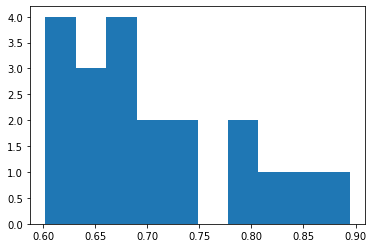

In [33]:
# Show confidence distribution
plt.hist(rules['confidence'])
plt.show()

In [34]:
# Show the rules that have confidance > 0.75
high_confidance = rules[rules['confidence'] > 0.75]
high_confidance [['antecedents', 'consequents']]

,antecedents,consequents
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER)
10,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER )
14,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER )
17,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER)
18,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER )


### 3.2 Netherlands, Spain, France Countries Data

In [35]:
# Build the Apriori model
rep_items_nl = apriori(df_itms_togthr_nl, min_support = 0.1, use_colnames = True, verbose = 1)
rep_items_nl.head()

Processing 60 combinations | Sampling itemset size 4


,support,itemsets
0,0.106383,(72 SWEETHEART FAIRY CAKE CASES)
1,0.127660,(CARD DOLLY GIRL )
2,0.117021,(CHARLOTTE BAG PINK POLKADOT)
3,0.117021,(CHARLOTTE BAG SUKI DESIGN)
4,0.138298,(CHILDRENS APRON SPACEBOY DESIGN)


In [36]:
# Generate the association rules dataframe
rules_nl = association_rules(rep_items_nl, metric = "confidence", min_threshold = 0.6)
rules_nl.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF 4 FRUITS ),(DOLLY GIRL LUNCH BOX),0.180851,0.234043,0.117021,0.647059,2.764706,0.074694,2.170213
1,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.234043,0.265957,0.170213,0.727273,2.734545,0.107967,2.691489
2,(ROUND SNACK BOXES SET OF4 WOODLAND ),(DOLLY GIRL LUNCH BOX),0.265957,0.234043,0.170213,0.640000,2.734545,0.107967,2.127660
3,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.234043,0.297872,0.223404,0.954545,3.204545,0.153689,15.446809
4,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.297872,0.234043,0.223404,0.750000,3.204545,0.153689,3.063830


In [37]:
# The number of rules
rules_nl.shape[0]

64

In [38]:
high_confidance_nl = rules_nl[rules_nl['confidence'] > 0.75]
high_confidance_nl [['antecedents', 'consequents']]

,antecedents,consequents
3,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX )
9,(LUNCH BAG SPACEBOY DESIGN ),(SPACEBOY LUNCH BOX )
10,(LUNCH BAG SUKI DESIGN ),(ROUND SNACK BOXES SET OF4 WOODLAND )
11,(PACK OF 60 SPACEBOY CAKE CASES),(ROUND SNACK BOXES SET OF4 WOODLAND )
12,(PLASTERS IN TIN SPACEBOY),(ROUND SNACK BOXES SET OF4 WOODLAND )
13,(PLASTERS IN TIN SPACEBOY),(SPACEBOY LUNCH BOX )
14,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND )
15,(RED RETROSPOT CHARLOTTE BAG),(ROUND SNACK BOXES SET OF4 WOODLAND )
16,(RED TOADSTOOL LED NIGHT LIGHT),(ROUND SNACK BOXES SET OF4 WOODLAND )
21,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND )


In [39]:
# Build the Apriori model
rep_items_spain = apriori(df_itms_togthr_spain, min_support = 0.1, use_colnames = True, verbose = 1)
rep_items_spain.head()

Processing 240 combinations | Sampling itemset size 2


,support,itemsets
0,0.170455,(6 RIBBONS RUSTIC CHARM)
1,0.136364,(ASSORTED COLOUR BIRD ORNAMENT)
2,0.113636,(CLASSIC METAL BIRDCAGE PLANT HOLDER)
3,0.102273,(DOLLY GIRL LUNCH BOX)
4,0.159091,(JAM MAKING SET WITH JARS)


In [40]:
# Generate the association rules dataframe
rules_spain = association_rules(rep_items_spain, metric = "confidence", min_threshold = 0.6)
rules_spain

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.136364,0.170455,0.102273,0.75,4.4,0.079029,3.318182
1,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.170455,0.136364,0.102273,0.60,4.4,0.079029,2.159091


In [41]:
# The number of rules
rules_spain.shape[0]

2

In [42]:
high_confidance_spain = rules_spain[rules_spain['confidence'] > 0.75]
high_confidance_spain [['antecedents', 'consequents']]

,antecedents,consequents
0,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM)


In [43]:
# Build the Apriori model
rep_items_france = apriori(df_itms_togthr_france, min_support = 0.05, use_colnames = True, verbose = 1)
rep_items_france.head()

Processing 36 combinations | Sampling itemset size 4


,support,itemsets
0,0.073879,(4 TRADITIONAL SPINNING TOPS)
1,0.100264,(ALARM CLOCK BAKELIKE GREEN)
2,0.105541,(ALARM CLOCK BAKELIKE PINK)
3,0.097625,(ALARM CLOCK BAKELIKE RED )
4,0.071240,(ASSORTED COLOUR MINI CASES)


In [44]:
# Generate the association rules dataframe
rules_france = association_rules(rep_items_france, metric = "confidence", min_threshold = 0.6)
rules_france

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.105541,0.100264,0.076517,0.725000,7.230921,0.065935,3.271768
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.100264,0.105541,0.076517,0.763158,7.230921,0.065935,3.776605
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.097625,0.100264,0.081794,0.837838,8.356330,0.072006,5.548373
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.100264,0.097625,0.081794,0.815789,8.356330,0.072006,4.898605
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.105541,0.097625,0.076517,0.725000,7.426351,0.066214,3.281362
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.097625,0.105541,0.076517,0.783784,7.426351,0.066214,4.136873
6,(CHILDRENS CUTLERY DOLLY GIRL ),(CHILDRENS CUTLERY SPACEBOY ),0.073879,0.071240,0.065963,0.892857,12.533069,0.060700,8.668426
7,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL ),0.071240,0.073879,0.065963,0.925926,12.533069,0.060700,12.502639
8,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.102902,0.129288,0.073879,0.717949,5.553114,0.060575,3.087071
9,(LUNCH BAG DOLLY GIRL DESIGN),(LUNCH BAG SPACEBOY DESIGN ),0.087071,0.124011,0.052770,0.606061,4.887170,0.041973,2.223666


In [45]:
# The number of rules
rules_france.shape[0]

38

In [47]:
high_confidance_france = rules_france[rules_france['confidence'] > 0.75]
high_confidance_france [['antecedents', 'consequents']]

,antecedents,consequents
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK)
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN)
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED )
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK)
6,(CHILDRENS CUTLERY DOLLY GIRL ),(CHILDRENS CUTLERY SPACEBOY )
7,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL )
10,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS)
11,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 6 SKULL PAPER PLATES)
15,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS)
18,(SET/20 RED RETROSPOT PAPER NAPKINS ),(SET/6 RED SPOTTY PAPER CUPS)


### 3.3 Results Discussion

The results of association analysis show which item is frequently purchased with other items. The result of association analysis using the whole dataset is differnt than the result of association analysis when using a dataset of a spacific country. 

## 4. Summary

Apriori algorithm gave us some rules about the item that is frequently purchased with other items. The result of association analysis using the whole dataset different than the result of association analysis when using a dataset of a specific country. These rules are helpful for items recommendation in the e-commerce websites.   